In [1]:
G_path = './Project_Data'
import pandas as pd
import seaborn as sns
from sklearn import *
import sklearn as sk
from sklearn import *
import numpy as np
from datetime import datetime	
from scipy.stats import chi2_contingency
import datetime as dt
import pickle

import json
import random
import scipy as sp
import seaborn as sns

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F

from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from statistics import mean
import warnings
warnings.filterwarnings('ignore')
import features
from features.usefull_functions import *
from features.NETs import *
from features.Model_Training import *
pd.get_option("display.max_columns")

SyntaxError: cannot delete literal (usefull_functions.py, line 532)

In [2]:
image_label = 'image_label'  #[image_label, binary_label]
select_features = False
remove_All_augmented = True
remove_wrong_cnn_predictions = False

file = 'CNN_280x210_Ouput_MultiClass_SoftMax' #[CNN_280x210_Ouput_MultiClass_SoftMax,CNN_280x210_Ouput_MultiClass_NoSoftMax,CNN_280x210_Ouput_MultiClass_Scaled]

data = pd.read_pickle(G_path + '/07_CNNs_Output_DataSet/' + file)

if remove_All_augmented:
    data = data[~data.image_id.str.contains('AUG')]

blc_test_list = pickle.load(open(G_path + '/02_Augmented_MetaData/balanced_test_set','rb'))
# Evaluation_set = pickle.load(open(G_path + '/DataSet_280x210/' + file,'rb'))


cols_remove = ['image_id','image_label','dx','lesion_id','type','binary_label','label_description']

selected_feature = ['CNN_0','CNN_1','CNN_2','CNN_3','CNN_4','CNN_5','CNN_6','age','dx_type_consensus','dx_type_follow_up','dx_type_histo']
cnn_ = ['CNN_0','CNN_1','CNN_2','CNN_3','CNN_4','CNN_5','CNN_6']



train_data = data[data.type=='train']
if remove_wrong_cnn_predictions:

    print('train initial shape: ', train_data.shape)
    train_data['cnn_label'] = train_data[cols].apply(lambda x : np.array(x[cnn_]).argmax(),axis=1)
    train_data = train_data[train_data.cnn_label == train_data.image_label]
    train_data.drop(columns=['cnn_label'],inplace=True)
    print('train removed wrong CNN shape: ',train_data.shape)

valid_data = data[data.type=='valid']
test_data = data[data.type=='test']
blc_test_data = data.merge(blc_test_list['image_id'], how='inner',on='image_id')


train_label = train_data[image_label]
train_data = train_data.drop(columns= cols_remove)
valid_label = valid_data[image_label]
valid_data = valid_data.drop(columns=cols_remove)
test_label = test_data[image_label]
test_data = test_data.drop(columns=cols_remove)
blc_label = blc_test_data[image_label]
blc_data = blc_test_data.drop(columns=cols_remove)

if select_features:
    train_data = train_data[selected_feature]
    valid_data = valid_data[selected_feature]
    test_data = test_data[selected_feature]
    blc_data = blc_test_data[selected_feature]


train_data_arrays = np.stack(train_data.values)  
train_label_arrays = np.stack(train_label.values)
train_label_arrays_One = pd.get_dummies(train_label_arrays).values  

valid_data_arrays = np.stack(valid_data.values)  
valid_label_arrays = np.stack(valid_label.values)  
valid_label_arrays_One = pd.get_dummies(valid_label_arrays).values  

test_data_arrays = np.stack(test_data.values)  
test_label_arrays = np.stack(test_label.values)  
test_label_arrays_One = pd.get_dummies(test_label_arrays).values  

blc_data_arrays = np.stack(blc_data.values)  
blc_label_arrays = np.stack(blc_label.values)  
blc_label_arrays_One = pd.get_dummies(blc_label_arrays).values 

#Numpy Arrays
input_data_Array = (train_data_arrays , valid_data_arrays, test_data_arrays , np.concatenate((train_data_arrays,valid_data_arrays )))
labels_Array = (train_label_arrays,valid_label_arrays,test_label_arrays, np.concatenate((train_label_arrays,valid_label_arrays)))
labels_One_Array = (train_label_arrays_One,valid_label_arrays_One,test_label_arrays_One, np.concatenate((train_label_arrays_One,valid_label_arrays_One)))

# Tensors
def to_Torch(x):
    return torch.tensor(x,dtype= torch.float32)

# input_data_Tensor = (to_Torch(train_data_arrays),to_Torch(valid_data_arrays)  , to_Torch(test_data_arrays) , to_Torch(np.concatenate((train_data_arrays,valid_data_arrays))))
# labels_Tensor = (to_Torch(train_label_arrays),to_Torch(valid_label_arrays),to_Torch(test_label_arrays) , to_Torch(np.concatenate((train_label_arrays,valid_label_arrays))) )
# labels_OneHot_Tensor = (to_Torch(train_label_arrays_One),to_Torch(valid_label_arrays_One),to_Torch(test_label_arrays_One), to_Torch(np.concatenate((train_label_arrays_One,valid_label_arrays_One))))

# blc_data_Tensor = (to_Torch(blc_data_arrays))

# print('Train set shape: ', train_data_arrays.shape)

In [3]:
Aug_list = data[data.image_id.str.contains('AUG')][['image_id','image_label']]
Aug_list['image_id'] = Aug_list['image_id'].str.replace('AUG1_','').str.replace('AUG2_','').str.replace('AUG3_','')
Aug_list[['image_id','image_label']].value_counts()

Series([], dtype: int64)

In [4]:
id = 'ISIC_0034306'
cols = ['CNN_0','CNN_1','CNN_2','CNN_3','CNN_4','CNN_5','CNN_6','image_label', 'image_id']
cnn_ = ['CNN_0','CNN_1','CNN_2','CNN_3','CNN_4','CNN_5','CNN_6']
aug_details = data[data.image_id.str.contains(id)][cols]
aug_details['predicted'] = aug_details.apply(lambda x: np.array(x[cnn_]).argmax(),axis=1)
aug_details

,CNN_0,CNN_1,CNN_2,CNN_3,CNN_4,CNN_5,CNN_6,image_label,image_id,predicted
3366,0.000097,0.958211,0.000019,9.813207e-07,0.00331,0.032399,0.005964,1,ISIC_0034306,1


In [5]:
train_label_arrays, train_data['CNN_0'].max() , input_data_Array[0].shape

(array([2, 2, 1, ..., 5, 4, 5], dtype=int8), 0.99990606, (3253, 30))

# **Guassian NB**

In [6]:
Model_ = sk.naive_bayes.GaussianNB()
# kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
kflods = sk.model_selection.StratifiedKFold(n_splits=10, shuffle=True)
cross_valid = True
save_model = True
nr_repeat = 10

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = { 
    'priors': [None],
    'var_smoothing': [0,4e-1,5e-1,3e-1,1e-1,0.5e-1, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}

GB_Model, GB_Details = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat,best_selection='recall' )

date_hour = datetime.now().strftime("%d_%b%y_%H_%M")
if save_model:
    pickle.dump(GB_Model, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'GB_Model_' + date_hour , 'wb'))

NameError: name 'grid_searc_cross_valid_trainer' is not defined

Nr. of Data : 
 407
Accuracy of The Model : 
 0.6928746928746928


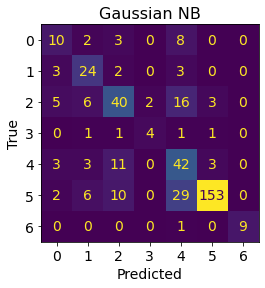

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.7%,43.5%,43.5%,96.6%,43.5%
1,7.9%,57.1%,75.0%,95.2%,64.9%
2,17.7%,59.7%,55.6%,91.9%,57.6%
3,2.0%,66.7%,50.0%,99.5%,57.1%
4,15.2%,42.0%,67.7%,83.2%,51.9%
5,49.1%,95.6%,76.5%,96.6%,85.0%
6,2.5%,100.0%,90.0%,100.0%,94.7%
Simple Avg.,nan%,66.4%,65.5%,94.7%,64.9%
Weighted Avg.,nan%,74.7%,69.3%,93.8%,70.9%


In [8]:
# Model 280x210
model_ = GB_Model
X = input_data_Array[2]
Y = labels_Array[2]
Y_pred = model_.predict(X)
Y_binary =  label_to_binary(Y)
Y_pred_binary =  label_to_binary(Y_pred)
results = model_evaluation(Y,Y_pred,'Gaussian NB')
# results = model_evaluation(Y_binary,Y_pred_binary)
results

# **Random Forrest**

In [9]:
Model_ = sk.ensemble.RandomForestClassifier( n_jobs=-1)
# kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
kflods = sk.model_selection.StratifiedKFold(n_splits=10, shuffle=True)

cross_valid = True
save_model = False
nr_repeat = 1

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = { 
    'n_estimators': [200],
    'max_features': ['auto', 'log2'],
    'max_depth' : [30,40],
    'min_samples_leaf': [2, 5,10],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [False],
    'class_weight' : [None, 'balanced'],
    'max_leaf_nodes' : [None],
    'max_features' : ['log2', None]
}

grid = { 
    'n_estimators': [50,100,200],
    'max_features': ['auto'],
    'max_depth' : [10,20],
    'min_samples_leaf': [2,10],
    'criterion' :[ 'gini','entropy'],
    'bootstrap': [False,True],
    'class_weight' : [None, 'balanced'],
    'max_leaf_nodes' : [None],
    'max_features' : ['log2', None]
}
# grid = { 
#     'n_estimators': [200,400],
#     'max_features': ['auto'],
#     'max_depth' : [40],
#     'min_samples_leaf': [10],
#     'criterion' :['gini'],
#     'bootstrap': [False],
#     'class_weight' : ['balanced'],
#     'max_leaf_nodes' : [None],
#     'max_features' : ['log2']
# }

RF_Model, RF_Details = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat,best_selection='recall')

date_hour = datetime.now().strftime("%d_%b%y_%H_%M")
if save_model:
    pickle.dump(RF_Model, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'RF_Model_' + date_hour , 'wb'))

 Max_Valid_Acc.: 93.2%, Max_Test_Acc.: 72.7%, Expected_test_Acc.: 70.0% [██████████████████████████████] 1921/1920 [Time => Iter.: 0.5s, Tot.: 412.7s, Remain.: -0.2s]     Remain.: 0.0s]      

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

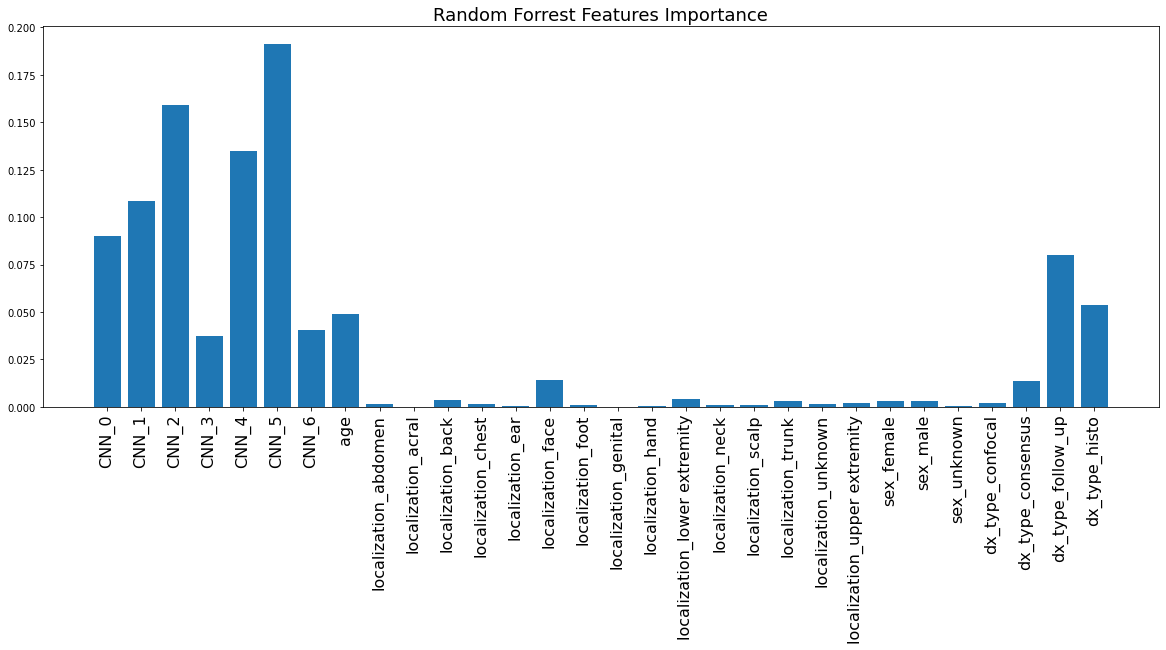

In [10]:
importance = RF_Model.feature_importances_

features_name = list(train_data.columns)
plt.subplots(figsize=(20,7))
plt.bar(features_name, importance)
plt.xticks(fontsize=16, rotation=90)
plt.title('Random Forrest Features Importance',fontsize = 18)
plt.show()

Nr. of Data : 
 407
Accuracy of The Model : 
 0.7125307125307125


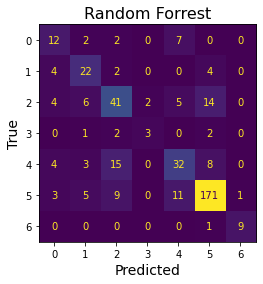

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.7%,44.4%,52.2%,96.1%,48.0%
1,7.9%,56.4%,68.8%,95.5%,62.0%
2,17.7%,57.7%,56.9%,91.0%,57.3%
3,2.0%,60.0%,37.5%,99.5%,46.2%
4,15.2%,58.2%,51.6%,93.3%,54.7%
5,49.1%,85.5%,85.5%,86.0%,85.5%
6,2.5%,90.0%,90.0%,99.7%,90.0%
Simple Avg.,nan%,64.6%,63.2%,94.5%,63.4%
Weighted Avg.,nan%,71.4%,71.3%,89.9%,71.2%


In [11]:
# Model 280x210
model_ = RF_Model
X = input_data_Array[2]
Y = labels_Array[2]
Y_pred = model_.predict(X)
Y_pred_prob = model_.predict_proba(X)
Y_binary =  label_to_binary(Y)
Y_pred_binary =  label_to_binary(Y_pred)
results = model_evaluation(Y,Y_pred,'Random Forrest')
# results = model_evaluation(Y_binary,Y_pred_binary)
results

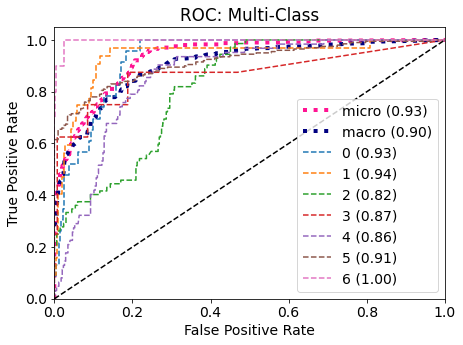

In [29]:
Y_OneH = sk.preprocessing.label_binarize(Y,classes=np.unique(Y))
fpr, tpr, roc_auc = fpr_tpr_score(Y_OneH,Y_pred_prob)
plot_roc_auc_multi(fpr, tpr, roc_auc)

# **SVM**

In [12]:
Model_ = sk.svm.SVC(random_state=0)
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = False
save_model = False
nr_repeat = 1

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = { 
    'C' : [8,10,12]
    ,'kernel': ['rbf', 'linear'],
    'degree' : [1,3],
    'gamma' :['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'class_weight' : [None, 'balanced']
}

SVM_Model, SVM_Details = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)

if save_model:
    pickle.dump(SVM_Model, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'SVM_Model' , 'wb'))
    

 Max_Valid_Acc.: 76.2%, Max_Test_Acc.: 71.3%, Expected_test_Acc.: 70.8% [██████████████████████████████] 97/96 [Time => Iter.: 0.1s, Tot.: 10.4s, Remain.: -0.1s]    
------- Precision recal %--------
              precision    recall  f1-score   support

           0       0.46      0.52      0.49        23
           1       0.55      0.69      0.61        32
           2       0.56      0.62      0.59        72
           3       0.75      0.38      0.50         8
           4       0.52      0.53      0.52        62
           5       0.90      0.82      0.86       200
           6       0.82      0.90      0.86        10

    accuracy                           0.71       407
   macro avg       0.65      0.64      0.63       407
weighted avg       0.73      0.71      0.71       407

Best param:  {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Nr. of Data : 
 407
Accuracy of The Model : 
 0.7076167076167076


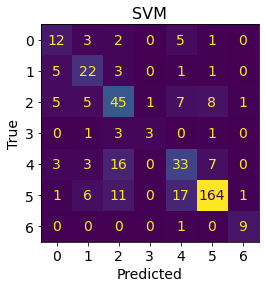

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.7%,46.2%,52.2%,96.4%,49.0%
1,7.9%,55.0%,68.8%,95.2%,61.1%
2,17.7%,56.2%,62.5%,89.6%,59.2%
3,2.0%,75.0%,37.5%,99.7%,50.0%
4,15.2%,51.6%,53.2%,91.0%,52.4%
5,49.1%,90.1%,82.0%,91.3%,85.9%
6,2.5%,81.8%,90.0%,99.5%,85.7%
Simple Avg.,nan%,65.1%,63.7%,94.7%,63.3%
Weighted Avg.,nan%,72.5%,70.8%,91.9%,71.3%


In [13]:
# Model 280x210
model_ = SVM_Model
X = input_data_Array[2]
Y = labels_Array[2]
Y_pred = model_.predict(X)
Y_binary =  label_to_binary(Y)
Y_pred_binary =  label_to_binary(Y_pred)
results = model_evaluation(Y,Y_pred,'SVM')
# results = model_evaluation(Y_binary,Y_pred_binary)
results

**Cross Validation**

In [14]:
Model_ = sk.svm.SVC(random_state=0)
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = True
save_model = False
nr_repeat = 10

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = { 
    'C' : [10]
    ,'kernel': ['rbf'],
    'degree' : [1],
    'gamma' :['scale'],
    'decision_function_shape': ['ovo'],
    'class_weight' : [None]
}

SVM_Model_CV, SVM_Details_CV = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)

if save_model:
    pickle.dump(SVM_Model_CV, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'SVM_Model_CV' , 'wb'))
    pickle.dump(SVM_Details_CV, open(G_path + '/08_Saved_Models_Outpus/Cross_Valid_Results/' + 'SVM_Model_CV' , 'wb'))

------- Precision recal %--------█████████████████████████████████████████████████████████████████████████████████] 100/100
              precision    recall  f1-score   support

           0       0.50      0.65      0.57        23
           1       0.54      0.69      0.60        32
           2       0.66      0.68      0.67        72
           3       0.67      0.50      0.57         8
           4       0.54      0.44      0.48        62
           5       0.88      0.85      0.87       200
           6       0.82      0.90      0.86        10

    accuracy                           0.73       407
   macro avg       0.66      0.67      0.66       407
weighted avg       0.73      0.73      0.73       407

Best param:  {'C': 10, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# **MLP**

In [1]:
Model_ = sk.neural_network.MLPClassifier()
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = False
save_model = True
nr_repeat = 1

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = {
    'hidden_layer_sizes': [(50,60,50),(40,60,30)],
    'random_state':[0],
    'activation': [ 'relu'],
    'solver': ['sgd',],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['adaptive'],
    'learning_rate_init' : 10.00 ** -np.arange(2, 4)
}

MLP_Model, MLP_Details = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)
if save_model:
    pickle.dump(MLP_Model, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'MLP_Model' , 'wb'))
    

NameError: name 'sk' is not defined

Nr. of Data : 
 407
Accuracy of The Model : 
 0.7272727272727273


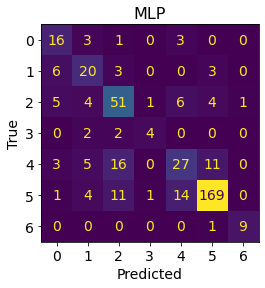

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.7%,51.6%,69.6%,96.1%,59.3%
1,7.9%,52.6%,62.5%,95.2%,57.1%
2,17.7%,60.7%,70.8%,90.1%,65.4%
3,2.0%,66.7%,50.0%,99.5%,57.1%
4,15.2%,54.0%,43.5%,93.3%,48.2%
5,49.1%,89.9%,84.5%,90.8%,87.1%
6,2.5%,90.0%,90.0%,99.7%,90.0%
Simple Avg.,nan%,66.5%,67.3%,95.0%,66.3%
Weighted Avg.,nan%,73.7%,72.7%,92.1%,72.9%


In [19]:
# Model 280x210
model_ = MLP_Model
X = input_data_Array[2]
Y = labels_Array[2]
Y_pred = model_.predict(X)
Y_binary =  label_to_binary(Y)
Y_pred_binary =  label_to_binary(Y_pred)
results = model_evaluation(Y,Y_pred,'MLP')
# results = model_evaluation(Y_binary,Y_pred_binary)
results

**Cross Validation**

In [20]:
Model_ = sk.neural_network.MLPClassifier()
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = True
save_model = True
nr_repeat = 10

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = {
    'hidden_layer_sizes': [(50,60,50)],
    'random_state':[0],
    'activation': [ 'relu'],
    'solver': ['sgd',],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'learning_rate_init' : [1e-2]
}

MLP_Model_CV, MLP_Details_CV = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)
if save_model:
    pickle.dump(MLP_Model_CV, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'MLP_Model_CV' , 'wb'))
    pickle.dump(MLP_Details_CV, open(G_path + '/08_Saved_Models_Outpus/Cross_Valid_Results/' + 'MLP_Model_CV' , 'wb'))

------- Precision recal %--------█████████████████████████████████████████████████████████████████████████████████] 100/100
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.52      0.69      0.59        32
           2       0.67      0.64      0.65        72
           3       0.67      0.50      0.57         8
           4       0.52      0.48      0.50        62
           5       0.89      0.85      0.87       200
           6       0.90      0.90      0.90        10

    accuracy                           0.73       407
   macro avg       0.67      0.68      0.67       407
weighted avg       0.74      0.73      0.73       407

Best param:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 60, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'random_state': 0, 'solver': 'sgd'}


# **KNN**

In [21]:
Model_ = neighbors.KNeighborsClassifier(n_jobs=-1)
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = True
save_model = True
nr_repeat = 1

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = { 
    'n_neighbors': [7,8,12],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size' : [20,25],
    'p' : [1,2,5]
}

KNN_Model, KNN_Details = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)

if save_model:
    pickle.dump(KNN_Model, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'KNN_Model' , 'wb'))

------- Precision recal %--------█████████████████████████████████████████████████████████████████████████████████] 1440/1440
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        23
           1       0.64      0.66      0.65        32
           2       0.65      0.74      0.69        72
           3       0.71      0.62      0.67         8
           4       0.52      0.55      0.53        62
           5       0.92      0.83      0.87       200
           6       1.00      0.70      0.82        10

    accuracy                           0.73       407
   macro avg       0.69      0.67      0.67       407
weighted avg       0.76      0.73      0.74       407

Best param:  {'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}


Nr. of Data : 
 407
Accuracy of The Model : 
 0.7346437346437347


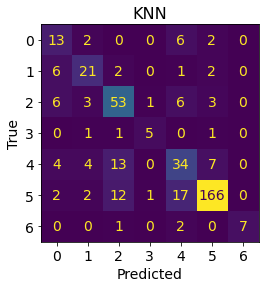

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.7%,41.9%,56.5%,95.3%,48.1%
1,7.9%,63.6%,65.6%,96.8%,64.6%
2,17.7%,64.6%,73.6%,91.3%,68.8%
3,2.0%,71.4%,62.5%,99.5%,66.7%
4,15.2%,51.5%,54.8%,90.7%,53.1%
5,49.1%,91.7%,83.0%,92.8%,87.1%
6,2.5%,100.0%,70.0%,100.0%,82.4%
Simple Avg.,nan%,69.3%,66.6%,95.2%,67.3%
Weighted Avg.,nan%,75.6%,73.5%,93.0%,74.2%


In [22]:
# Model 280x210
model_ = KNN_Model
X = input_data_Array[2]
Y = labels_Array[2]
# X = blc_data_arrays
# Y = blc_label_arrays
Y_pred = model_.predict(X)
Y_binary =  label_to_binary(Y)
Y_pred_binary =  label_to_binary(Y_pred)
results = model_evaluation(Y,Y_pred,'KNN')
# results = model_evaluation(Y_binary,Y_pred_binary)
results

**Cross Validation**

In [23]:
Model_ = neighbors.KNeighborsClassifier(n_jobs=-1)
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = True
save_model = True
nr_repeat = 10

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = { 
    'n_neighbors': [8],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size' : [25],
    'p' : [2]
}

KNN_Model_CV, KNN_Details_CV = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)

if save_model:
    pickle.dump(KNN_Model_CV, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'KNN_Model_CV' , 'wb'))
    pickle.dump(KNN_Details_CV, open(G_path + '/08_Saved_Models_Outpus/Cross_Valid_Results/' + 'KNN_Model_CV' , 'wb'))

------- Precision recal %--------█████████████████████████████████████████████████████████████████████████████████] 100/100
              precision    recall  f1-score   support

           0       0.38      0.52      0.44        23
           1       0.61      0.59      0.60        32
           2       0.68      0.74      0.71        72
           3       0.71      0.62      0.67         8
           4       0.48      0.47      0.48        62
           5       0.89      0.85      0.87       200
           6       1.00      0.90      0.95        10

    accuracy                           0.73       407
   macro avg       0.68      0.67      0.67       407
weighted avg       0.74      0.73      0.73       407

Best param:  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}


# **Biased Classifier**

In [24]:
Dum_class = sk.dummy.DummyClassifier(strategy="most_frequent" )

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

Dum_class.fit(X_train, Y_train)

Y = Y_test
Y_pred = Dum_class.predict(X_test)

print(sk.metrics.classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        62
           5       0.49      1.00      0.66       200
           6       0.00      0.00      0.00        10

    accuracy                           0.49       407
   macro avg       0.07      0.14      0.09       407
weighted avg       0.24      0.49      0.32       407



In [25]:
test_recall_weighed, test_specificity_weighed, _ = recall_specificity_precision(Y,Y_pred,weighted_avg=True)

In [26]:
Model_ = sk.dummy.DummyClassifier(strategy="most_frequent" )
kflods = sk.model_selection.KFold(n_splits=10, shuffle=True)
cross_valid = True
save_model = True
nr_repeat = 10

X_train = input_data_Array[0]
Y_train = labels_Array[0]
X_valid = input_data_Array[1]
Y_valid = labels_Array[1]
X_test = input_data_Array[2]
Y_test = labels_Array[2]

grid = {}

Biased_Model_CV, Biased_Details_CV = grid_searc_cross_valid_trainer(Model_, grid, cross_valid, kflods,X_train=X_train , Y_train=Y_train,X_valid=X_valid,Y_valid=Y_valid,X_test=X_test, Y_test=Y_test,nr_repeat=nr_repeat)

if save_model:
    pickle.dump(Biased_Model_CV, open(G_path + '/08_Saved_Models_Outpus/Models/Classifiers/' + 'Biased_Model_CV' , 'wb'))
    pickle.dump(Biased_Details_CV, open(G_path + '/08_Saved_Models_Outpus/Cross_Valid_Results/' + 'Biased_Model_CV' , 'wb'))

------- Precision recal %--------█████████████████████████████████████████████████████████████████████████████████] 100/100
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        62
           5       0.49      1.00      0.66       200
           6       0.00      0.00      0.00        10

    accuracy                           0.49       407
   macro avg       0.07      0.14      0.09       407
weighted avg       0.24      0.49      0.32       407

Best param:  {}


In [27]:
CNN_Rescaled_Details = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Cross_Valid_Results/' + 'CNN_Rescaled_Details_MultiClass' ,'rb'))
CNN_A_E_Details = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Cross_Valid_Results/' + 'CNN_A_E_Details_MultiClass' ,'rb'))

In [28]:
c = 'test_recall_weighed'
df = [CNN_A_E_Details,CNN_Rescaled_Details,RF_Details_CV,SVM_Details_CV,MLP_Details_CV,GB_Details_CV,KNN_Details_CV,Biased_Details_CV]
clss_name = ['CNN-A.E.','CNN-Resc.','RF','SVM','MLP','GB','KNN','Biased']
df_0 = pd.DataFrame()
for i in range(0, len(df)):
    df_00 = pd.DataFrame(df[i][c].values, columns=[clss_name[i]])
    df_0 = pd.concat([df_0,df_00],axis=1)

Sensitivity = df_0

In [33]:
c = 'test_recall_weighed'
x = list(RF_Details_CV[c])
y = list(GB_Details_CV[c])
from scipy.stats.mstats import f_oneway
f, p = f_oneway(x, y)
print("Anova's p-value = ", p)
print("Anova's f = ", f)

eff_size = (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2.0)
eff_size

Anova's p-value =  1.9755432751551668e-143
Anova's f =  5118.305657649242


10.168584675160066

In [31]:
len(y)

10

In [36]:

(t, p) = sp.stats.wilcoxon(x, y)
t, p

(0.0, 3.679402088127131e-18)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


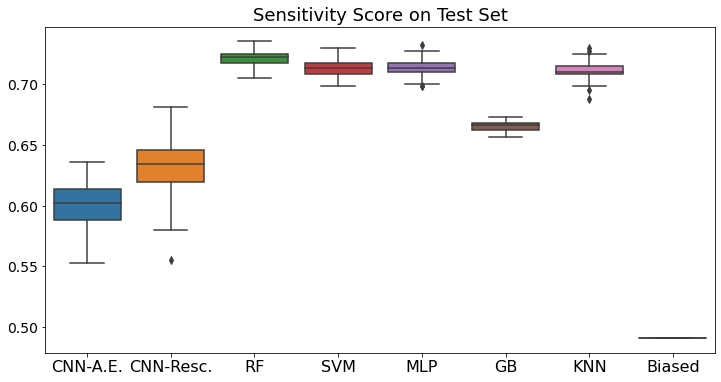

In [29]:
plt.subplots(figsize=(12,6))
sns.boxplot(data=Sensitivity)
plt.title('Sensitivity Score on Test Set',fontsize = 18)
# plt.xlabel("Classifiers", fontsize = 14)
# plt.ylabel("Accuracy", fontsize = 14)
plt.xticks(fontsize=16, rotation=0)
plt.show()

In [30]:
c = 'test_specificity_weighed'
df = [CNN_A_E_Details,CNN_Rescaled_Details,RF_Details_CV,SVM_Details_CV,MLP_Details_CV,GB_Details_CV,KNN_Details_CV,Biased_Details_CV]
clss_name = ['CNN-A.E.','CNN-Resc.','RF','SVM','MLP','GB','KNN','Biased']
df_0 = pd.DataFrame()
for i in range(0, len(df)):
    df_00 = pd.DataFrame(df[i][c].values, columns=[clss_name[i]])
    df_0 = pd.concat([df_0,df_00],axis=1)

specificity = df_0

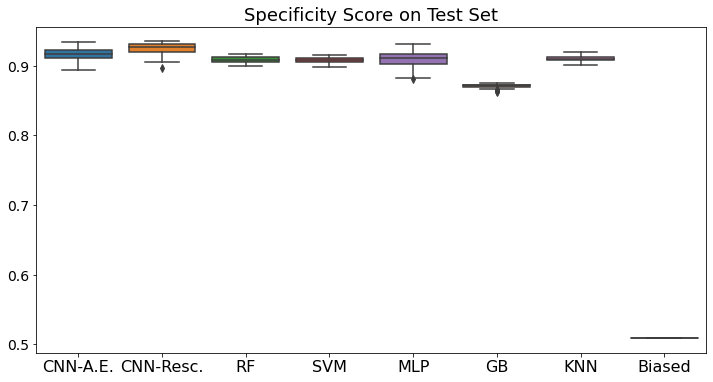

In [31]:
plt.subplots(figsize=(12,6))
sns.boxplot(data=specificity)
plt.title('Specificity Score on Test Set',fontsize = 18)
# plt.xlabel("Classifiers", fontsize = 14)
# plt.ylabel("Accuracy", fontsize = 14)
plt.xticks(fontsize=16, rotation=0)
plt.show()